In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\diddy\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\diddy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\diddy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\diddy\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
In C:\Users\diddy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\diddy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed tw

In [ ]:
df = pd.read_csv('counterfactual_examples_800.csv')
df.head()

In [ ]:
$workclass
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.0912 0.0632 0.7186 0.1270
class 2:  0.1272 0.0788 0.6776 0.1164
class 3:  0.1826 0.0923 0.5000 0.2250
class 4:  0.0940 0.0871 0.7165 0.1024

$education
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)  Pr(7)  Pr(8)
class 1:  0.0811 0.0696 0.0574 0.0779 0.0100 0.0634 0.4333 0.2072
class 2:  0.1034 0.1101 0.1307 0.1111 0.0173 0.1206 0.3434 0.0633
class 3:  0.0958 0.1970 0.1922 0.2017 0.0038 0.2157 0.0200 0.0736
class 4:  0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000

$marital_status
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0260 0.0123 0.8792 0.0348 0.0477
class 2:  0.0087 0.0115 0.9365 0.0230 0.0203
class 3:  0.0220 0.0491 0.8351 0.0456 0.0483
class 4:  0.2366 0.2720 0.0000 0.2355 0.2559

$occupation
          Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:      0 0.1199 0.0798 0.0866 0.0760 0.6378
class 2:      0 0.2311 0.0433 0.0487 0.0660 0.6108
class 3:      0 0.5080 0.1218 0.1184 0.2102 0.0416
class 4:      0 0.1766 0.0734 0.0802 0.0821 0.5878

$race
           Pr(1)  Pr(2)
class 1:  0.1842 0.8158
class 2:  0.1033 0.8967
class 3:  0.3016 0.6984
class 4:  0.1137 0.8863

$gender
           Pr(1)  Pr(2)
class 1:  0.4111 0.5889
class 2:  0.9131 0.0869
class 3:  0.5266 0.4734
class 4:  0.9114 0.0886

In [ ]:
# 半角スペースをカンマに変換
s = """
class 1:  0.4111 0.5889
class 2:  0.9131 0.0869
class 3:  0.5266 0.4734
class 4:  0.9114 0.0886
"""

print(s.replace(' ', ', '))

In [6]:
class_workclass = [[0.0912, 0.0632, 0.7186, 0.1270], [0.1272, 0.0788, 0.6776, 0.1164], [0.1826, 0.0923, 0.5000, 0.2250], [0.0940, 0.0871, 0.7165, 0.1024]]
class_education = [[0.0811, 0.0696, 0.0574, 0.0779, 0.0100, 0.0634, 0.4333, 0.2072], [0.1034, 0.1101, 0.1307, 0.1111, 0.0173, 0.1206, 0.3434, 0.0633], [0.0958, 0.1970, 0.1922, 0.2017, 0.0038, 0.2157, 0.0200, 0.0736], [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]
class_marital_status = [[0.0260, 0.0123, 0.8792, 0.0348, 0.0477], [0.0087, 0.0115, 0.9365, 0.0230, 0.0203], [0.0220, 0.0491, 0.8351, 0.0456, 0.0483], [0.2366, 0.2720, 0.0000, 0.2355, 0.2559]]
class_occupation = [[0, 0.1199, 0.0798, 0.0866, 0.0760, 0.6378], [0, 0.2311, 0.0433, 0.0487, 0.0660, 0.6108], [0, 0.5080, 0.1218, 0.1184, 0.2102, 0.0416], [0, 0.1766, 0.0734, 0.0802, 0.0821, 0.5878]]
class_race = [[0.1842, 0.8158], [0.1033, 0.8967], [0.3016, 0.6984], [0.1137, 0.8863]]
class_gender = [[0.4111, 0.5889], [0.9131, 0.0869], [0.5266, 0.4734], [0.9114, 0.0886]]
#class_age = [[0.0000, 0.2471, 0.4562, 0.2174, 0.0697, 0.0094], [0.0000, 0.3135, 0.5083, 0.1284, 0.0322, 0.0174], [0.0000, 0.1604, 0.5009, 0.3060, 0.0327, 0.0000]]
#class_hours_per_week = [[0.0056, 0.6134, 0.3370, 0.0363, 0.0076], [0.0798, 0.5177, 0.3290, 0.0571, 0.0164], [0.0391, 0.8392, 0.1101, 0.0116, 0.0000]]

In [ ]:
# 800
#class_workclass = [[0.1980, 0.0000, 0.4135, 0.3885], [0.1045, 0.0024, 0.7180, 0.1750], [0.6022, 0.0000, 0.3978, 0.0000]]
#class_education = [[0.0422, 0.2482, 0.1997, 0.3426, 0, 0.1608, 0.0066, 0], [0.0585, 0.5728, 0.0321, 0.2991, 0.0000, 0.0156, 0.0219, 0.0000], [0.0000, 0.0000, 0.2352, 0.7648, 0.0000, 0.0000, 0.0000, 0.0000]]
#class_marital_status = [[0.0000, 0.0267, 0.9628, 0.0105, 0.0000], [0.0000, 0.0031, 0.9969, 0.0000, 0.0000], [0.0000, 0.0000, 0.9901, 0.0099, 0.0000]]
#class_occupation = [[0.0000, 0.9239, 0.0170, 0.0000, 0.0591, 0.0000], [0.0024, 0.0818, 0.1105, 0.0268, 0.7784, 0.0000], [0.0000, 0.7551, 0.0000, 0.0000, 0.2449, 0.0000]]
#class_race = [[0.0373, 0.9627], [0.0174, 0.9826], [0.0675, 0.9325]]
#class_gender = [[0.0757, 0.9243], [0.0226, 0.9774], [0.1170, 0.8830]]
#class_age = [[0.0000, 0.2801, 0.4983, 0.1572, 0.0551, 0.0093], [0.0000, 0.2240, 0.4358, 0.2487, 0.0891, 0.0025], [0.0000, 0.1260, 0.4585, 0.3778, 0.0378, 0.0000]]
#class_hours_per_week = [[0.0262, 0.4016, 0.4789, 0.0834, 0.0098], [0.0034, 0.2932, 0.6277, 0.0661, 0.0095], [0.0000, 0.8013, 0.1987, 0.0000, 0.0000]]

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


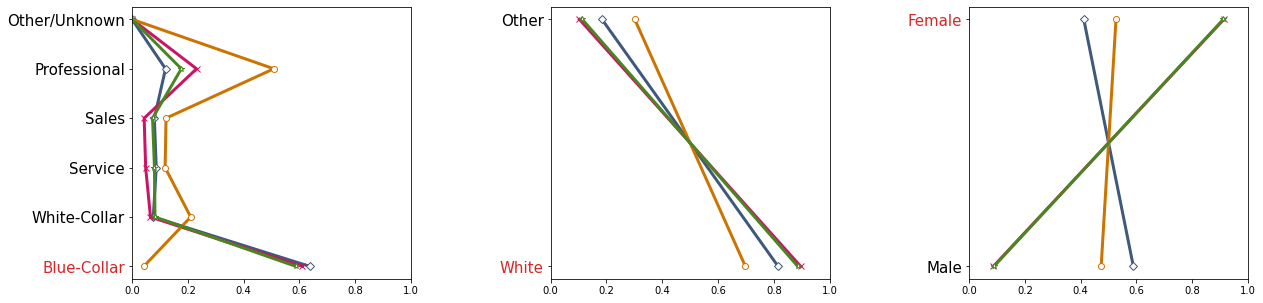

In [7]:
# 図作成
id_workclass = ['Government', 'Other/Unknown', 'Private', 'Self-Employed']
# SchoolとHs-gradが無い
id_education = ['Assoc', 'Bachelors', 'Doctorate', 'Masters', 'School', 'Prof-school', 'HS-grad', 'Some-college']
# SeparatedとWidowedが無い
id_marital_status = ['Separated', 'Divorced', 'Married', 'Widowed', 'Single']
# Blue-Collarが無い
id_occupation = ['Other/Unknown', 'Professional', 'Sales', 'Service', 'White-Collar', 'Blue-Collar']
id_race = ['Other', 'White']
id_gender = ['Female', 'Male']
#id_age = ['21~30', '31~41', '42~51', '52~62', '63~72', '73~83']
#id_age = ['21~30', '31~40', '44~50', '51~59', '60~69', '70~79']
#id_hours_per_week = ['21~36', '37~52', '53~67', '68~83', '84~99']
#id_hours_per_week = ['21~34', '35~48', '49~62', '63~76', '77~90']
header = ['occupation', 'race', 'gender', 'workclass', 'education', 'marital_status', 'age', 'hours_per_week']
# 余白を設定
#plt.figure(figsize=(20, 5))
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace=.5, hspace=0.3)
#colors = ["tab:blue", "tab:pink", "tab:orange", "tab:green"]
colors = ["#3F597C", "#CC1464", "#CC7400", "#4A8522"]
markers = ["D", "x", "o", "*"]
labels = ["Segment 1 (31%)", "Segment 2 (35%)", "Segment 3 (23%)", "Segment 4 (11%)"]

j = 0
for i, row in zip(range(4, 7), header):
    ax = plt.subplot(2, 3, i)
    #ax = plt.subplot(2, 6, i)
    ax = plt.subplot(1, 3, i-3)
    #plt.title(row)
    for j in range(4):
        """if row == 'age':
            plt.plot(class_age[j], list(reversed(range(len(class_age[j])))), marker=markers[j], markerfacecolor='white', color=colors[j])
            plt.xlim(0, 1)
            plt.xlabel('Probability')
            plt.yticks(list(reversed(range(len(class_age[j])))) ,id_age)
            [t.set_color('tab:red') if k==0 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
        elif row == 'hours_per_week':
            plt.plot(class_hours_per_week[j], list(reversed(range(len(class_hours_per_week[j])))), marker=markers[j], markerfacecolor='white', color=colors[j])
            plt.xlim(0, 1)
            plt.xlabel('Probability')
            plt.yticks(list(reversed(range(len(class_hours_per_week[j])))) ,id_hours_per_week)
            [t.set_color('tab:red') if k==1 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
        """
        if row == 'workclass': 
            plt.plot(class_workclass[j], list(reversed(range(len(class_workclass[j])))), marker=markers[j], markerfacecolor='white', color=colors[j], label=labels[j], linewidth=3)
            plt.yticks(list(reversed(range(len(class_workclass[j])))) ,id_workclass, fontsize=15)
            [t.set_color('tab:red') if k==2 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
            #plt.xlabel('Probability')
            #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        elif row == 'education': 
            plt.plot(class_education[j], list(reversed(range(len(class_education[j])))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3)
            plt.yticks(list(reversed(range(len(class_education[j])))) ,id_education, fontsize=15)
            [t.set_color('tab:red') if k==6 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
            #plt.xlabel('Probability')
        elif row == 'marital_status': 
            plt.plot(class_marital_status[j], list(reversed(range(len(class_marital_status[j])))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3)
            plt.yticks(list(reversed(range(len(class_marital_status[j])))) ,id_marital_status, fontsize=15)
            [t.set_color('tab:red') if k==2 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
            #plt.xlabel('Probability')
        elif row == 'occupation': 
            plt.plot(class_occupation[j], list(reversed(range(len(class_occupation[j])))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3)
            plt.yticks(list(reversed(range(len(class_occupation[j])))) ,id_occupation, fontsize=15)
            [t.set_color('tab:red') if k==5 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
            #plt.xlabel('Probability')
        elif row == 'race': 
            plt.plot(class_race[j], list(reversed(range(len(class_race[j])))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3)
            plt.yticks(list(reversed(range(len(class_race[j])))) ,id_race, fontsize=15)
            [t.set_color('tab:red') if k==1 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
            #plt.xlabel('Probability')
        elif row == 'gender': 
            plt.plot(class_gender[j], list(reversed(range(len(class_gender[j])))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3)
            plt.yticks(list(reversed(range(len(class_gender[j])))) ,id_gender, fontsize=15)
            [t.set_color('tab:red') if k==0 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
            #plt.xlabel('Probability')
#plt.savefig("segment_1000_all_ga_extra_6.png")
#plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=4, fancybox=True, shadow=True)
plt.show()

In [3]:
lca_1 = pd.read_csv("./R/csv/age_30_hw_38.csv")
lca_2 = pd.read_csv("./R/csv/age_29_income_026.csv")
lca_1.head()

,Unnamed: 0,V1,V2,V3,V4
0,1,1,0,0,0
1,2,1,0,0,0
2,3,1,0,0,0
3,4,1,0,0,0
4,5,1,0,0,0


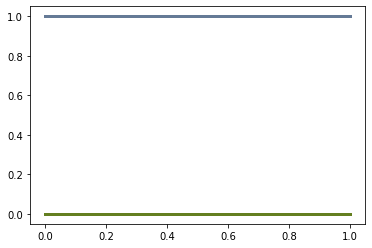

In [18]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(0, 1, 0.001), lca_1["V1"], color=colors[0], linewidth=3, alpha=0.8, label="セグメント 1")
plt.plot(np.arange(0, 1, 0.001), lca_1["V2"], color=colors[1], linewidth=3, alpha=0.8, label="セグメント 2")
plt.plot(np.arange(0, 1, 0.001), lca_1["V3"], color=colors[2], linewidth=3, alpha=0.8, label="セグメント 3")
plt.plot(np.arange(0, 1, 0.001), lca_1["V4"], color=colors[3], linewidth=3, alpha=0.8, label="セグメント 4")
#plt.savefig("class_income")
#plt.legend()
plt.show()

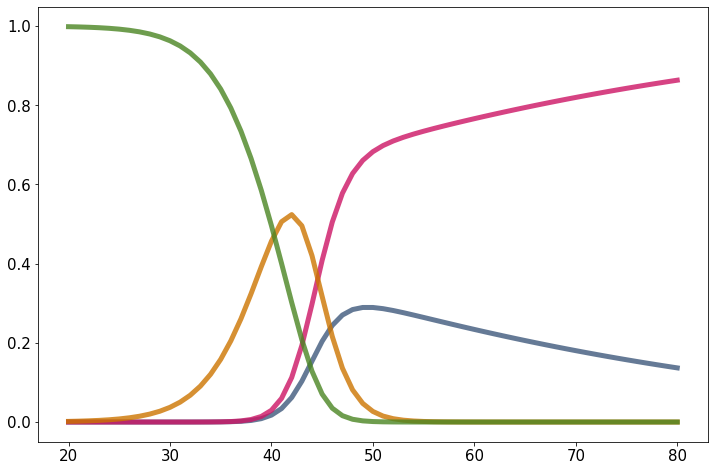

In [19]:
plt.figure(figsize=(12,8))
plt.plot(range(20, 81), lca_2["V1"], color=colors[0], linewidth=5, alpha=0.8, label="セグメント 1")
plt.plot(range(20, 81), lca_2["V2"], color=colors[1], linewidth=5, alpha=0.8, label="セグメント 2")
plt.plot(range(20, 81), lca_2["V3"], color=colors[2], linewidth=5, alpha=0.8, label="セグメント 3")
plt.plot(range(20, 81), lca_2["V4"], color=colors[3], linewidth=5, alpha=0.8, label="セグメント 4")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("class_hw")
plt.show()